# Exercise Set 5

## Exercise 1: Solving a Differential Equation

We are given the differential equation

$$ \frac{dx}{dt} = -tx^2 $$

with initial condition

$$ x(0)=2 $$

Find $x$ at $t=-0.2$, correct to two decimal places

### Part a: Taylor series method of order 2  (Euler's Method)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#define function that returns dx/dt
def f(x, t):
    return -t*x**2

#set initial condition x(0)=2
x_init = 2

#set step size such that the problem is completed in a single step
h = -0.2

#calculate x(-0.2) according to Euler's method
x_final = x_init + h*f(x_init,0)

#print the result
print ('x(-0.2) =', x_final)

x(-0.2) = 2.0


### Part b: Runge-Kutta method of order 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#define function that returns dx/dt
def f(x, t):
    return -t*x**2

#set initial condition x(0)=2
h = -0.2

#set step size such that the problem is completed in a single step
x_init = 2

#set the values of k1 and k2 according the rk2 method
k1 = h*f(2, 0)
k2 = h*f(2 + k1/2, h/2)

#calculate x(-0.2) according to the rk2 method
x_final = 2 + k2

#print the result
print ('x(-0.2) =', x_final)

x(-0.2) = 1.92


## Exercise 2: Projectile Motion wit Air Resistance

The arabolic motion of a projectile is spoiled by air resistance (drag force). Given a drag coefficiant $k$, we can write the time change of a projectile momentum as:

$$ \frac{dp}{dt} = mg - kv^2$$

For a spherical projectile, take values of $m = 10^{-2} \mathrm{kg}$ and $k = 10^{-4} \mathrm{kg/s^2}$.

###  Part a:

Use the 4th-order Runge-Kutta program with adaptive step sizes to find the velocity $v = p/m$ as a function of time for $t<10\mathrm{s}$, assuming the projectile is released from rest. Try to adapt the step sizes so that you obtail 4 significant digits of accuracy.


First note that $p = mv$ so:

$$\frac{dp}{dt} = m\frac{dv}{dt}$$

which implies that:

$$\frac{dv}{dt} = g - \frac{k}{m}v^2$$

By taking defining the following functions:

$$
\begin{align}
& y^{(0)}(t) = x(t) \\
& y^{(1)}(t) = \frac{dx}{dt} = \frac{dy^{(0)}(t)}{dt}
\end{align}
$$

We can decompose the differential equation into two, first-order differential equations.

$$
\begin{align}
& \frac{dy^{(0)}}{dt} = y^{(1)}(t) \\
& \frac{dy^{(1)}}{dt} = g - \frac{k}{m}(y^{(1)})^2
\end{align}
$$

These graphs have an error within 5.1e-05


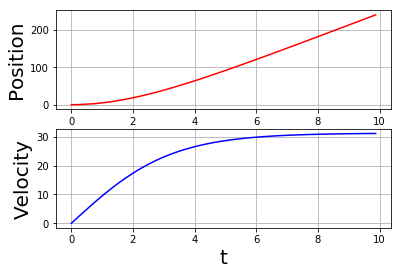

In [10]:
# not y1 is position and y2 is velocity


import matplotlib.pyplot as plt
import numpy as np

#   Initialization
a = 0. #lower bound of t
b = 10.#upper bound of t
Tol = 0.000001  #Ensure that we maintain 4 digits of accuracy
g=9.8 #gravitational constant
k = 10**(-4) #set value of air resistance
m = 10**(-2) #set value of mass
                                
#define arrays used for latter comparissons
ydumb = np.zeros((2), float)
y = np.zeros((2), float)
fReturn = np.zeros((2), float)
err = np.zeros((2), float)

#define arrays to store the k-values used in rk45
k1 = np.zeros((2), float)
k2 = np.zeros((2), float)
k3 = np.zeros((2), float)
k4 = np.zeros((2), float)
k5 = np.zeros((2), float)
k6 = np.zeros((2), float)
n = 20  #set desired number of steps (assuming h is not decreased or increased)
yy1=np.zeros((451),float) #set array to store the values of x
yy2=np.zeros((451),float) #set array to store the values of v
tt=np.zeros((451),float) #set array to store the values of t at which x and v were calculated
y[0] = 0 #initial position
y[1] = 0 #initial velocity

h = (b-a)/n #set step size according to the desired number of steps and the range
hmin=h/128 #set minimum value of step sizes
hmax=h*128 #set maximum value of step sizes
t = a #set the initial time to the lower bound of t 
flops =0
error=0.
sum =0.
tt[0]=t
yy1[0]=y[0]
yy2[0]=y[1]
jj=0

#set function that stores the current value of position and the current value of velocity
def f(t, y, fReturn ):
    fReturn[0] = y[1]
    fReturn[1] = g-(k/m)*pow(y[1], 2)
    
plt.figure(1)                         
plt.subplot(2,1,1)                    # 1st subplot in figure

while (t < b):   #while t is not above the upper bound of t
    yy1[jj]=y[0] #set the first value of x to its initial condition
    yy2[jj]=y[1] #set the second value of v to its initial conditon
    tt[jj]=t     #set the first value of t to its initial condition
                                            
    if ( (t + h) > b ): #if the next step will take you over the maximum value of t
        h = b - t       #change the step size such that you will reach the maximum value but not go over it
    f(t, y, fReturn)    #update fReturn
    k1[0] = h*fReturn[0];     k1[1] = h*fReturn[1] #evaluate k1 for both differential equations
    
    for i in range(0,2): #update y1 and y2, then evaluate k2 for both differential equations
        ydumb[i] = y[i] + k1[i]/4 
    f(t + h/4, ydumb, fReturn) 
    k2[0] = h*fReturn[0];     k2[1] = h*fReturn[1]
   
    for i in range(0,2): #update y1 and y2, then evaluate k3 for both differential equations
        ydumb[i] = y[i]+3*k1[i]/32 + 9*k2[i]/32
    f(t + 3*h/8, ydumb, fReturn) 
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    
    for i in range(0,2): #update y1 and y2, then evaluate k4 for both differential equations
        ydumb[i] = y[i] + 1932*k1[i]/2197-7200*k2[i]/2197. + 7296*k3[i]/2197 
    f(t + 12*h/13, ydumb, fReturn) 
    k4[0] = h*fReturn[0]; k4[1] = h*fReturn[1]   
    
    for i in range(0,2): #update y1 and y2, then evaluate k5 for both differential equations
        ydumb[i] = y[i]+439*k1[i]/216 -8*k2[i]+ 3680*k3[i]/513 -845*k4[i]/4104 
    f(t + h, ydumb, fReturn) 
    k5[0] = h*fReturn[0]; k5[1] = h*fReturn[1]   
    
    for i in range(0,2): #update y1 and y2, then evaluate k6 for both differential equations
        ydumb[i] = y[i] -8*k1[i]/27 + 2*k2[i]-3544*k3[i]/2565 + 1859*k4[i]/4104 -11*k5[i]/40 
    f(t + h/2, ydumb, fReturn) 
    k6[0] = h*fReturn[0]; k6[1] = h*fReturn[1]; 
    
    for i in range(0,2): #find error on y1 and y2
        err[i] = abs( k1[i]/360 - 128*k3[i]/4275 - 2197*k4[i]/75240 + k5[i]/50. +2*k6[i]/55)
    
    #so long as the error is within the acceptable bound and h is not too small
    if ( err[0] < Tol or err[1] < Tol or h <= 2*hmin ):
        # Accept step size
        for i in range(0,2):
            y[i] = y[i] + 25*k1[i]/216. + 1408*k3[i]/2565. + 2197*k4[i]/4104. - k5[i]/5.
        t = t + h 
          
      
    if ( err[0]==0 or err[1]==0 ):
        s = 0                  
    else:
        s = 0.84*pow(Tol*h/err[0], 0.25)                
    if ( s  <  0.75 and h > 2*hmin ):
        h /= 2.                       
    else:
        if ( s > 1.5 and 2* h  <  hmax ):
            h *= 2.      
    flops = flops +1  #number of accepted values
    jj +=1

    
plt.plot(tt[:flops],yy1[:flops],'r') 
plt.grid(True)
plt.ylabel('Position', fontsize = 20)
plt.subplot(2,1,2)
plt.plot(tt[:flops],yy2[:flops],'b')
plt.grid(True)
plt.xlabel('t', fontsize = 20)
plt.ylabel('Velocity', fontsize = 20)

print ('These graphs have an error within', Tol*flops)

plt.show()

### Part b:

Compare your numerical result to the analytic result for $v$ expected with $k = 0$.

for $k=0$, we find that $v = (9.8)t \mathrm{m/s}$ whereas numerically, when accouunting for air resistance, the velocity increases assymptotically to some value.

YOU CAN SEE SOME OTHER (EASIER) METHODS FOR FINDING THE AME RESULTS BELOW

v(t=10)= 31.126591935228355


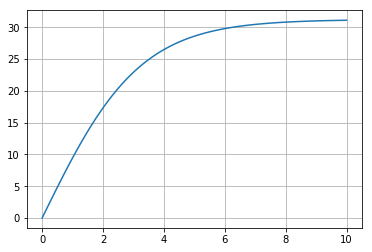

In [11]:
# Runge-Kutta 2 method, good to order O(h^3)

g = 9.764
m = 0.01
k = 0.0001

def f(t,v):
    return g - (k/m)*v**2

N = 100
t_values = np.linspace(0, 10, N)
h = t_values[1] - t_values[0]
v_values = np.zeros(N)
v_values[0] = 0.
for i in range(N-1):
    k1 = h * f(t_values[i], v_values[i])
    k2 = h * f(t_values[i]+h/2., v_values[i]+k1/2.)
    v_values[i+1] = v_values[i] + k2
print("v(t=10)=", v_values[-1])
plt.plot(t_values, v_values)
plt.grid()
plt.show()

31.12692641333183


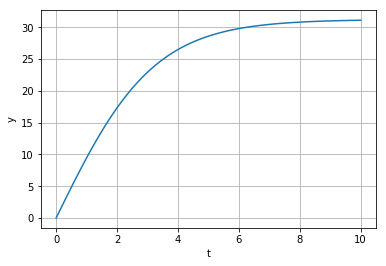

In [17]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib

g = 9.764
m = 0.01
k = 0.0001

#   Initialization
a = 0
b = 10
n = 100                                          
tt=np.zeros(n+1)
vv=np.zeros(n+1)
v = 0
t = a
tt[0]=t
vv[0]=v
h = (b-a)/(n-1);

def f(t,v):
    return g - (k/m)*v**2

j=0
while (t < b):                          # Time loop
    if ( (t + h) > b ): 
        h = b - t                       # Last step
    k1 = h * f(t, v)
    k2 = h*f(t + h/2., v + k1/2.)
    k3 = h*f(t + h/2., v + k2/2.)
    k4 = h*f(t + h, v + k3)
    v = v + (k1 + 2.*(k2 + k3) + k4)/6.
    j+=1 
    t+=h
    tt[j]=t
    vv[j]=v
        
print(vv[-1])
plt.plot(tt,vv) 
plt.grid(True)
plt.ylabel('y')
plt.xlabel('t')
plt.show()

## Exercise 3: Nonlinear Oscillations

In this problem we will stduy anharmonic oscillations in potentials in the form $V(x) = \frac{1}{p}kx^p$.

### Part a:

Use the 4th-order Runge-Kutta technique to plot the oscillations $x(t)$ of systems with $p = 2, 4, 8$. Confirm that energy is conserved during the oscillations.

Note that:

$$\frac{1}{m}F = \frac{dx^2}{dt^2} = -\frac{1}{m} \frac{dV}{dx} = -\frac{k}{m}x^{p-1}$$

so:

$$ \frac{dx^2}{dt^2}= -\frac{k}{m}x^{p-1}$$

Using the "reduction of order" technique, we decompose this second-order differential equation into two first-order differential equations.

$$
\begin{align}
& y^{(0)}(t) = x(t) \\
& y^{(1)}(t) = \frac{dx}{dt} = \frac{dy^{(0)}(t)}{dt}
\end{align}
$$

Thus:

$$
\begin{align}
& \frac{dy^{(0)}}{dt} = y^{(1)}(t) \\
& \frac{dy^{(1)}}{dt} = -\frac{k}{m}(y^{(0)})^{p-1}
\end{align}
$$

p = 2


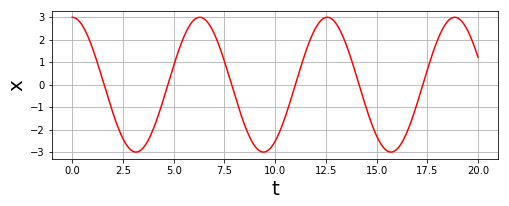

The peak at t = 0.0 has a height of 3.0 

The peak at t = 6.28300000000441 has a height of 2.9999999996762003 

The peak at t = 12.565999999997391 has a height of 2.99999999870476 

The peak at t = 18.848999999982748 has a height of 2.9999999970856552 

The period of cycle 0 is 6.28300000000441 seconds 

The period of cycle 1 is 6.282999999992981 seconds 

The period of cycle 2 is 6.282999999985357 seconds 

On average, the period is 6.282999999994249 seconds
p = 4


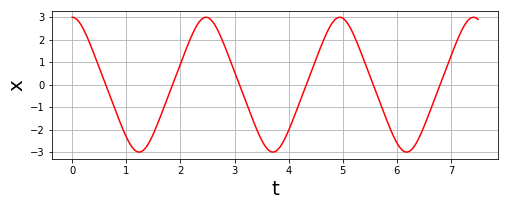

The peak at t = 0.0 has a height of 3.0 

The peak at t = 7.416224999988285 has a height of 2.999999999977542 

The peak at t = 2.4719999999998077 has a height of 2.9999999918504274 

The peak at t = 4.944074999994046 has a height of 2.999999990971668 

The period of cycle 0 is 2.4719999999998077 seconds 

The period of cycle 1 is 2.4720749999942386 seconds 

The period of cycle 2 is 2.4721499999942385 seconds 

On average, the period is 2.472074999996095 seconds
p = 8


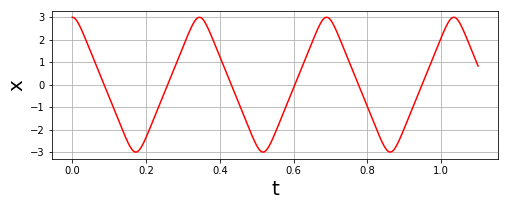

The peak at t = 0.0 has a height of 3.0 

The peak at t = 0.6895239999994323 has a height of 2.999999998040883 

The peak at t = 1.0342859999989071 has a height of 2.9999999866638603 

The peak at t = 0.3447619999999574 has a height of 2.9999999744819177 

The period of cycle 0 is 0.3447619999999574 seconds 

The period of cycle 1 is 0.3447619999994749 seconds 

The period of cycle 2 is 0.3447619999994749 seconds 

On average, the period is 0.3447619999996357 seconds


In [14]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt 
import numpy as np


for i in range(1,4):

#Set appropriate upper bounds for each value of p    
    if i == 1:
        b = 20
    if i == 2:
        b = 7.5
    if i == 3:
        b = 1.1

    p = 2**i #change value of p for every loop
    print ('p =', p)
    a = 0. #lower bound of t
    n = 100000 #desired number of steps                                      
    #set vectors to store relevant values in the rk4 calculations for both y1 and y2
    ydumb = np.zeros(2)
    y = np.zeros(2)
    tt=np.zeros(n+2)
    yy1=np.zeros(n+2)
    yy2=np.zeros(n+2)
    fReturn = np.zeros(2)
    k1 = np.zeros(2)
    k2 = np.zeros(2)
    k3 = np.zeros(2)
    k4 = np.zeros(2)
    y[0] = 3. #initial position
    y[1] = 0. #initial velocity
    t = a # set time to lower bound
    tt[0]=t # store ime values
    yy1[0]=y[0] #store initial position value
    yy2[0]=y[1] #store initial velocity value
    h = (b-a)/n #set step size according to t range and the desired number of steps
    j = 0

    #set function that stores the current value of position and the current value of velocity
    def f( t, y, fReturn ):
        fReturn[0] = y[1]
        fReturn[1] = -y[0]**(p-1)

    while (t < b):#while t is not above the upper bound of t
        if ( (t + h) > b ): #if the next step in t takes you over the upper bound
            h = b - t #set the next step such that it will take you to, but not over, the upper bound
        f(t, y, fReturn) #update the values of y1 and y2 in fReturn
        
        # evaluate k1, k2, k3, and k4 and update the values of y1 and y2 in fReturn along the way
        k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]  
        for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
        f(t + h/2., ydumb, fReturn) 
        k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
        for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
        f(t + h/2., ydumb, fReturn)
        k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
        for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
        f(t + h, ydumb, fReturn) 
        k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
        for i in range(0, 2): #calculate values of y1 and y2 using the values of k
            y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  #store values of y1 and y2
        yy2[j]=y[1]
    
    
    #plot the oscillations
    plt.figure(figsize=(8,6))
    plt.subplot(2,1,1)
    plt.plot(tt,yy1,'r') 
    plt.grid(True)
    plt.ylabel('x', fontsize = 20)
    plt.xlabel('t', fontsize = 20)
    plt.show()
    
    peak_index = np.zeros((4), float) #create an array of size 4 to store the index values of the peaks of the curve
    
    for a in range (0,4): #do the following 4 times
        index = np.argmax(yy1) #find the index of the largest position value
        peak_index[a] = index #store the index of the largest position value
        print ('The peak at t =', tt[index], 'has a height of', yy1[index], '\n') #print the time at which the largest peak occurs as well as the value
        yy1 = np.delete(yy1, index) #store the index of the peak
        
    period = np.zeros((3), float) #create an array of size 3 to store the time times at which the largest peaks are found
    
    peak_index.sort() #sort the index values
    
    for b in range (0,3):
        index1 = int(peak_index[b]) #set the first index
        index2 = int(peak_index[b+1]) #set the second index to the value index vaulue of the next peak
        period[b] = tt[index2] - tt[index1] #find the time between peaks (this is the period) and store it
        print('The period of cycle', b, 'is', period[b], 'seconds \n') #print the value of the period
    
    print ('On average, the period is', np.mean(period), 'seconds') #average the values of the periods found and print the results


Note that the value of the peaks are not decreasing with every cycle, instead they fluctuate up and down. This is to say that the amplitude is conserved (with some numerical fluctutations mixed in) implying that the energy is more or less conserved (barring some similar fluctuations).

### Part b:

Plot the period of oscillations as a function of initial amplitude for $p = 2,4,8$. Because the motion may be asymmetric, you must record the time for at least three cycles in order to find the period.


 
 
 p = 2 
 Amplitude = 1


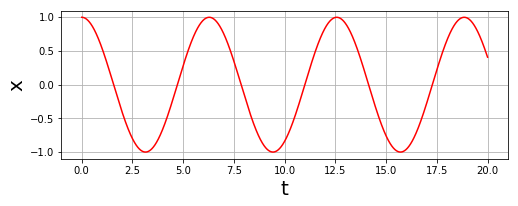

The peak at t = 0.0 has a height of 1.0 

The peak at t = 6.28300000000441 has a height of 0.9999999998920599 

The peak at t = 12.565999999997391 has a height of 0.99999999956823 

The peak at t = 18.848999999982748 has a height of 0.9999999990285225 

The period of cycle 0 is 6.28300000000441 seconds 

The period of cycle 1 is 6.282999999992981 seconds 

The period of cycle 2 is 6.282999999985357 seconds 

On average, the period is 6.282999999994249 seconds

 
 
 p = 2 
 Amplitude = 2


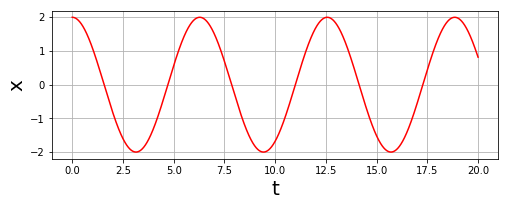

The peak at t = 0.0 has a height of 2.0 

The peak at t = 6.28300000000441 has a height of 1.9999999997841198 

The peak at t = 12.565999999997391 has a height of 1.99999999913646 

The peak at t = 18.848999999982748 has a height of 1.999999998057045 

The period of cycle 0 is 6.28300000000441 seconds 

The period of cycle 1 is 6.282999999992981 seconds 

The period of cycle 2 is 6.282999999985357 seconds 

On average, the period is 6.282999999994249 seconds

 
 
 p = 2 
 Amplitude = 3


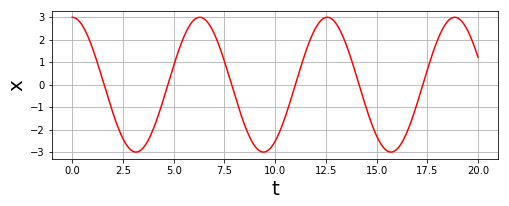

The peak at t = 0.0 has a height of 3.0 

The peak at t = 6.28300000000441 has a height of 2.9999999996762003 

The peak at t = 12.565999999997391 has a height of 2.99999999870476 

The peak at t = 18.848999999982748 has a height of 2.9999999970856552 

The period of cycle 0 is 6.28300000000441 seconds 

The period of cycle 1 is 6.282999999992981 seconds 

The period of cycle 2 is 6.282999999985357 seconds 

On average, the period is 6.282999999994249 seconds

 
 
 p = 2 
 Amplitude = 4


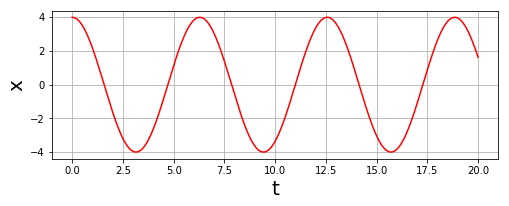

The peak at t = 0.0 has a height of 4.0 

The peak at t = 6.28300000000441 has a height of 3.9999999995682396 

The peak at t = 12.565999999997391 has a height of 3.99999999827292 

The peak at t = 18.848999999982748 has a height of 3.99999999611409 

The period of cycle 0 is 6.28300000000441 seconds 

The period of cycle 1 is 6.282999999992981 seconds 

The period of cycle 2 is 6.282999999985357 seconds 

On average, the period is 6.282999999994249 seconds


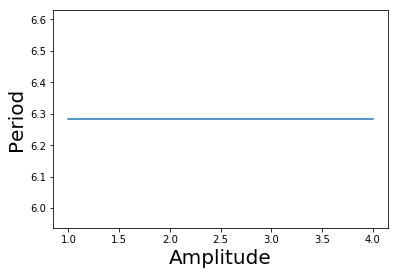


 
 
 p = 4 
 Amplitude = 1


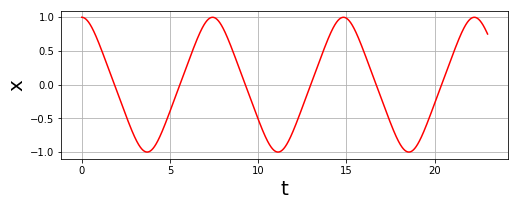

The peak at t = 0.0 has a height of 1.0 

The peak at t = 7.4161200000038106 has a height of 0.9999999986846309 

The peak at t = 22.248359999966805 has a height of 0.9999999971023115 

The peak at t = 14.832240000009437 has a height of 0.999999994738521 

The period of cycle 0 is 7.4161200000038106 seconds 

The period of cycle 1 is 7.416120000005626 seconds 

The period of cycle 2 is 7.416119999957369 seconds 

On average, the period is 7.416119999988935 seconds

 
 
 p = 4 
 Amplitude = 2


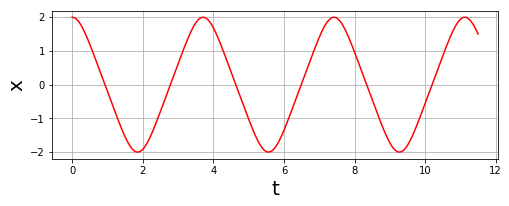

The peak at t = 0.0 has a height of 2.0 

The peak at t = 3.7080600000019053 has a height of 1.9999999973692617 

The peak at t = 11.124179999983403 has a height of 1.999999994204623 

The peak at t = 7.416120000004718 has a height of 1.999999989477042 

The period of cycle 0 is 3.7080600000019053 seconds 

The period of cycle 1 is 3.708060000002813 seconds 

The period of cycle 2 is 3.7080599999786843 seconds 

On average, the period is 3.7080599999944677 seconds

 
 
 p = 4 
 Amplitude = 3


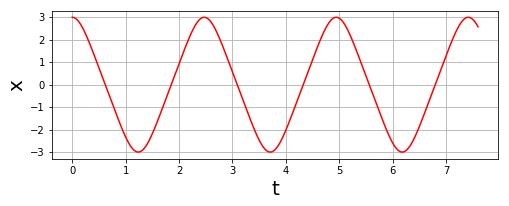

The peak at t = 0.0 has a height of 3.0 

The peak at t = 7.416231999996874 has a height of 2.999999998834692 

The peak at t = 4.944103999998013 has a height of 2.9999999950546883 

The peak at t = 2.4720519999991524 has a height of 2.9999999890882023 

The period of cycle 0 is 2.4720519999991524 seconds 

The period of cycle 1 is 2.472051999998861 seconds 

The period of cycle 2 is 2.472127999998861 seconds 

On average, the period is 2.4720773333322916 seconds

 
 
 p = 4 
 Amplitude = 4


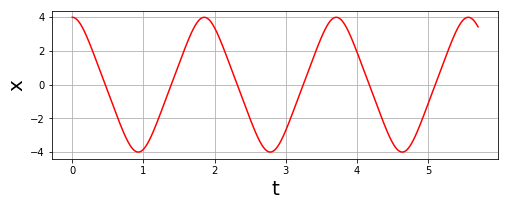

The peak at t = 0.0 has a height of 4.0 

The peak at t = 5.562173999997559 has a height of 3.9999999984462287 

The peak at t = 3.708077999998413 has a height of 3.999999993406226 

The peak at t = 1.854038999999267 has a height of 3.999999985450953 

The period of cycle 0 is 1.854038999999267 seconds 

The period of cycle 1 is 1.8540389999991458 seconds 

The period of cycle 2 is 1.8540959999991462 seconds 

On average, the period is 1.8540579999991864 seconds


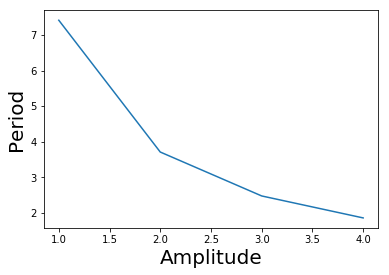


 
 
 p = 8 
 Amplitude = 1


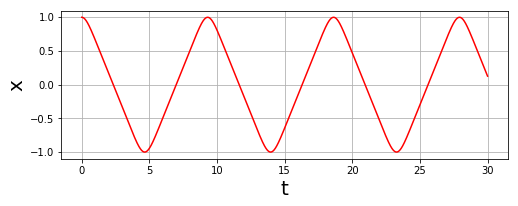

The peak at t = 0.0 has a height of 1.0 

The peak at t = 9.308400000000582 has a height of 0.999999999177047 

The peak at t = 18.616799999978888 has a height of 0.9999999967081912 

The peak at t = 27.925199999957194 has a height of 0.9999999925934294 

The period of cycle 0 is 9.308400000000582 seconds 

The period of cycle 1 is 9.308399999978306 seconds 

The period of cycle 2 is 9.308399999978306 seconds 

On average, the period is 9.308399999985731 seconds

 
 
 p = 8 
 Amplitude = 2


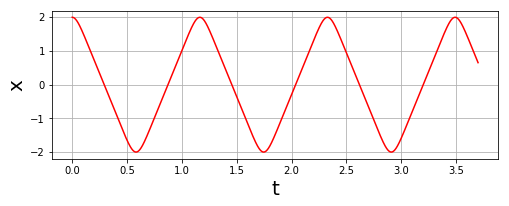

The peak at t = 0.0 has a height of 2.0 

The peak at t = 2.327151999999822 has a height of 1.9999999990476318 

The peak at t = 3.4906909999948756 has a height of 1.9999999896552394 

The peak at t = 1.1635389999997485 has a height of 1.999999982425264 

The period of cycle 0 is 1.1635389999997485 seconds 

The period of cycle 1 is 1.1636130000000733 seconds 

The period of cycle 2 is 1.1635389999950538 seconds 

On average, the period is 1.1635636666649585 seconds

 
 
 p = 8 
 Amplitude = 3


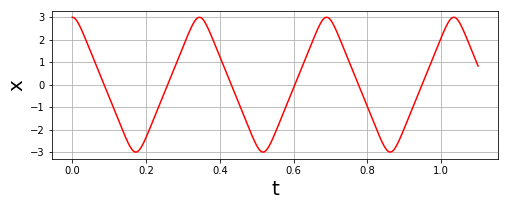

The peak at t = 0.0 has a height of 3.0 

The peak at t = 0.6895239999994323 has a height of 2.999999998040883 

The peak at t = 1.0342859999989071 has a height of 2.9999999866638603 

The peak at t = 0.3447619999999574 has a height of 2.9999999744819177 

The period of cycle 0 is 0.3447619999999574 seconds 

The period of cycle 1 is 0.3447619999994749 seconds 

The period of cycle 2 is 0.3447619999994749 seconds 

On average, the period is 0.3447619999996357 seconds

 
 
 p = 8 
 Amplitude = 4


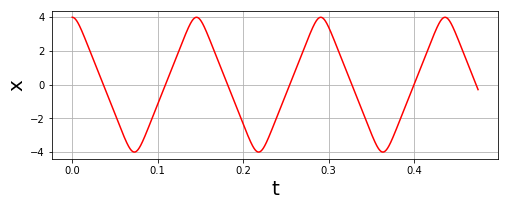

The peak at t = 0.0 has a height of 4.0 

The peak at t = 0.1454449999999512 has a height of 3.9999999962276362 

The peak at t = 0.2908899999998842 has a height of 3.9999999849105174 

The peak at t = 0.4363349999998172 has a height of 3.999999966048638 

The period of cycle 0 is 0.1454449999999512 seconds 

The period of cycle 1 is 0.145444999999933 seconds 

The period of cycle 2 is 0.145444999999933 seconds 

On average, the period is 0.14544499999993907 seconds


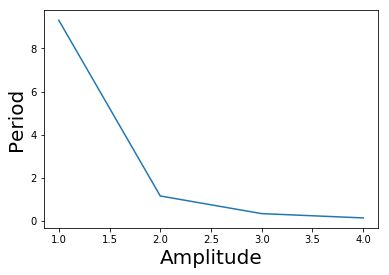

In [18]:
# rk4.py, Notebook Version

%matplotlib inline

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

Amplitude = [1,2,3,4] #store the values of the amplitude at which period was checked

for i in range(1,4): #itterate over p values
    
    p = 2**i
    Period = [] #set array to store values of the Period for the various amplitudes
    
    for c in range(1,5):
        
        #Set appropriate upper bounds for each value of p 
        if  p == 2:
            b = 20
        if p == 4 and c == 1:
            b = 23
        if p == 4 and c == 2:
            b = 11.5
        if p == 4 and c == 3:
            b = 7.6
        if p == 4 and c == 4:
            b = 5.7
        if p == 8 and c == 1:
            b = 30
        if p == 8 and c == 2:
            b = 3.7
        if p == 8 and c == 3:
            b = 1.1
        if p == 8 and c == 4:
            b = .475
    
        a = 0.
        n = 100000                                       
        ydumb = np.zeros(2)
        y = np.zeros(2)
        tt=np.zeros(n+2)
        yy1=np.zeros(n+2)
        yy2=np.zeros(n+2)
        fReturn = np.zeros(2)
        k1 = np.zeros(2)
        k2 = np.zeros(2)
        k3 = np.zeros(2)
        k4 = np.zeros(2)
        y[0] = c
        y[1] = 0.
        t = a
        tt[0]=t
        yy1[0]=y[0]
        yy2[0]=y[1]
        h = (b-a)/n
        j = 0
        
        print ('\n \n \n p =', p, '\n Amplitude =', c,) #print value of p and the amplitude    
        
        peak_index = np.zeros((4), float)
        period = np.zeros((3), float)

        def f( t, y, fReturn ):
            fReturn[0] = y[1]
            fReturn[1] = -y[0]**(p-1)

        while (t < b):
            if ( (t + h) > b ):
                h = b - t
            f(t, y, fReturn)                             
            k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1] 
            for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
            f(t + h/2., ydumb, fReturn) 
            k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
            for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
            f(t + h/2., ydumb, fReturn)
            k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
            for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
            f(t + h, ydumb, fReturn) 
            k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
            for i in range(0, 2): 
                y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
            j+=1 
            t+=h
            tt[j]=t
            yy1[j]=y[0]  
            yy2[j]=y[1]


        plt.figure(figsize=(8,6))
        plt.subplot(2,1,1)
        plt.plot(tt,yy1,'r') 
        plt.grid(True)
        plt.ylabel('x', fontsize = 20)
        plt.xlabel('t', fontsize = 20)
        plt.show()

        peak_index = np.zeros((4), float)

        for a in range (0,4):
            index = np.argmax(yy1)
            peak_index[a] = index
            print ('The peak at t =', tt[index], 'has a height of', yy1[index], '\n')
            yy1 = np.delete(yy1, index)
            
    
        peak_index.sort()

        for b in range (0,3):
            index1 = int(peak_index[b])
            index2 = int(peak_index[b+1])
            period[b] = tt[index2] - tt[index1]
            print('The period of cycle', b, 'is', period[b], 'seconds \n')

        print ('On average, the period is', np.mean(period), 'seconds')
        
        Period.append(np.mean(period)) #store the value of the period
        
    #plot period vs amplitude
    plt.plot(Amplitude, Period)
    plt.xlabel('Amplitude', fontsize = 20)
    plt.ylabel('Period', fontsize = 20)
    plt.show()


## Excercise 4

Now we will add an external driving force $F_{ext}$ to the harmonic oscillator system with $p=2$.

$$ F_{ext}(t) = F_0 \sin \omega t $$

Note that:

$$ \frac{dx^2}{dt^2}= \frac{F_0}{m} \sin \omega t-\frac{k}{m}x$$

Using the "reduction of order" technique, we decompose this second-order differential equation into two first-order differential equations.

$$
\begin{align}
& y^{(0)}(t) = x(t) \\
& y^{(1)}(t) = \frac{dx}{dt} = \frac{dy^{(0)}(t)}{dt}
\end{align}
$$

Thus:

$$
\begin{align}
& \frac{dy^{(0)}}{dt} = y^{(1)}(t) \\
& \frac{dy^{(1)}}{dt} = \frac{F_0}{m} \sin \omega t -\frac{k}{m}y^{(0)}
\end{align}
$$


### Part a:

Solve for and plot the oscillation of this system for a very large $F_0$ value. This is the same code as before just with and added $F_{ext}$ term.

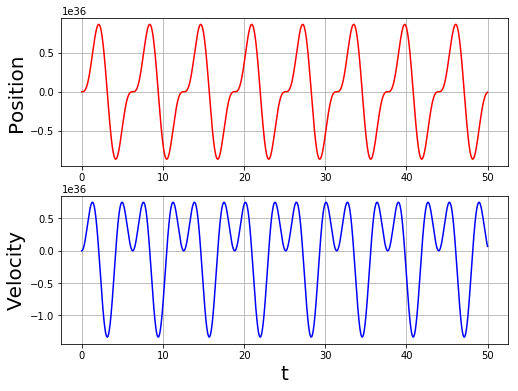

In [20]:
import matplotlib.pyplot as plt 
import numpy as np

#   Initialization
F_0 = 999999999999999999999999999999999999

a = 0.
b = 50
n = int(b*100.)
omega = 2
ydumb = np.zeros(2)
y = np.zeros(2)
tt=np.zeros(n+2)
yy1=np.zeros(n+2)
yy2=np.zeros(n+2)
fReturn = np.zeros(2)
k1 = np.zeros(2)
k2 = np.zeros(2)
k3 = np.zeros(2)
k4 = np.zeros(2)
y[0] = 1. 
y[1] = 0.
t = a
tt[0]=t
yy1[0]=y[0]
yy2[0]=y[1]
h = (b-a)/n
j = 0

def f( t, y, fReturn ):
    fReturn[0] = y[1]
    fReturn[1] = F_0*np.sin(omega*t)-y[0]

while (t < b):
    if ( (t + h) > b ):
        h = b - t
    f(t, y, fReturn)                             
    k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   
    for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
    f(t + h/2., ydumb, fReturn) 
    k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
    for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
    f(t + h/2., ydumb, fReturn)
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
    f(t + h, ydumb, fReturn) 
    k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
    for i in range(0, 2): 
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    j+=1 
    t+=h
    tt[j]=t
    yy1[j]=y[0]  
    yy2[j]=y[1]


plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(tt[:len(yy1)-1],yy1[:len(yy1)-1],'r') 
plt.grid(True)
plt.ylabel('Position', fontsize = 20)
plt.subplot(2,1,2)
plt.plot(tt[:len(yy2)-1],yy2[:len(yy2)-1],'b')
plt.grid(True)
plt.xlabel('t', fontsize = 20)
plt.ylabel('Velocity', fontsize = 20)
plt.show()

Note that because there is no damping, the transients never die out(though they get dominated by the driving force)

### Part b:

Now reduce $F_0$ until  it is approximately equal to the system restoring force $F_k(x) = -dV(x)/dx$, and verify that you see a beat frequency of $(\omega - \omega_0) / 2 \pi$, where $\omega_0$ is the natural frequency of the system.

Taking $\omega_0 = 1 \mathrm{Hz}$ and $\omega = 2 \mathrm{Hz}$ we expect a beat frequenct of $1.592 \mathrm{Hz}$

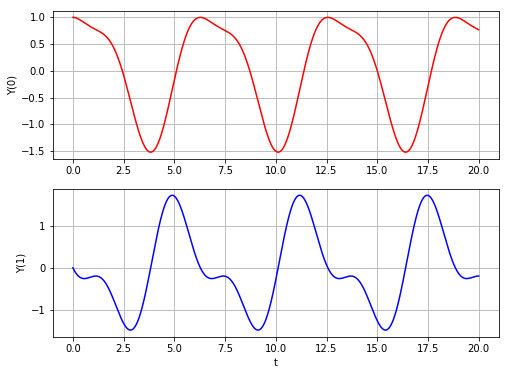

The period of cycle 0 is 6.269999999999911 seconds 

The period of cycle 1 is 6.279999999999866 seconds 

The period of cycle 2 is 6.290000000000369 seconds 

On average, the period is 6.280000000000048 seconds 

This implies a beat frequency of 0.1592356687898077 Hz


In [21]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

#   Initialization
F_0 = 1

a = 0.
b = 20
n = int(b*100.)
omega = 2
ydumb = np.zeros(2)
y = np.zeros(2)
tt=np.zeros(n+2)
yy1=np.zeros(n+2)
yy2=np.zeros(n+2)
fReturn = np.zeros(2)
k1 = np.zeros(2)
k2 = np.zeros(2)
k3 = np.zeros(2)
k4 = np.zeros(2)
y[0] = 1. 
y[1] = 0.
t = a
tt[0]=t
yy1[0]=y[0]
yy2[0]=y[1]
h = (b-a)/n
j = 0

def f( t, y, fReturn ):
    fReturn[0] = y[1]
    fReturn[1] = F_0*np.sin(omega*t)-y[0]

while (t < b):
    if ( (t + h) > b ):
        h = b - t
    f(t, y, fReturn)                              # Evaluate RHS's, return in fReturn
    k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
    for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
    f(t + h/2., ydumb, fReturn) 
    k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
    for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
    f(t + h/2., ydumb, fReturn)
    k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
    for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
    f(t + h, ydumb, fReturn) 
    k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
    for i in range(0, 2): 
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    j+=1 
    t+=h
    tt[j]=t
    yy1[j]=y[0]  
    yy2[j]=y[1]


plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(tt[:len(yy1)-1],yy1[:len(yy1)-1],'r') 
plt.grid(True)
plt.ylabel('Y(0)')
plt.subplot(2,1,2)
plt.plot(tt[:len(yy2)-1],yy2[:len(yy2)-1],'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Y(1)')
plt.show()

peak_index = np.zeros((4), float)
    
for a in range (0,4):
    index = np.argmax(yy1)
    peak_index[a] = index
    yy1 = np.delete(yy1, index)
        
period = np.zeros((3), float)
peak_index.sort()
    
for b in range (0,3):
    index1 = int(peak_index[b])
    index2 = int(peak_index[b+1])
    period[b] = tt[index2] - tt[index1]
    print('The period of cycle', b, 'is', period[b], 'seconds \n')
    
print ('On average, the period is', np.mean(period), 'seconds \n')

print ('This implies a beat frequency of', 1/np.mean(period), 'Hz')




### Part c:

Plot the maximum amplitude as a function of the driving frequency $\omega$ by scanning the interval $\omega_0/10 \leq 
\omega \leq 10\omega_0$. What features do you observe?

<function matplotlib.pyplot.show>

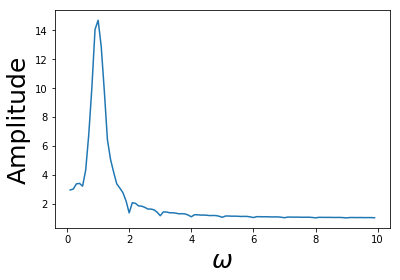

In [293]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

Amplitude = []
Omega = []

for omega in np.arange(0.1, 10, 0.1):
    
    Omega.append(omega)

    #   Initialization
    F_0 = 2
    a = 0.
    b = 20
    n = int(b*100.)
    ydumb = np.zeros(2)
    y = np.zeros(2)
    tt=np.zeros(n+2)
    yy1=np.zeros(n+2)
    yy2=np.zeros(n+2)
    fReturn = np.zeros(2)
    k1 = np.zeros(2)
    k2 = np.zeros(2)
    k3 = np.zeros(2)
    k4 = np.zeros(2)
    y[0] = 1. 
    y[1] = 0.
    t = a
    tt[0]=t
    yy1[0]=y[0]
    yy2[0]=y[1]
    h = (b-a)/n
    j = 0

    def f( t, y, fReturn ):
        fReturn[0] = y[1]
        fReturn[1] = F_0*np.sin(omega*t)-y[0]

    while (t < b):
        if ( (t + h) > b ):
            h = b - t
        f(t, y, fReturn)                              # Evaluate RHS's, return in fReturn
        k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
        for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
        f(t + h/2., ydumb, fReturn) 
        k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
        for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
        f(t + h/2., ydumb, fReturn)
        k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
        for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
        f(t + h, ydumb, fReturn) 
        k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
        for i in range(0, 2): 
            y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  
        yy2[j]=y[1]

    
    index = np.argmax(yy1)
    Amplitude.append(yy1[index])

plt.plot(Omega, Amplitude)
plt.xlabel('$\omega$', fontsize = 25)
plt.ylabel('Amplitude', fontsize = 25)
plt.show

There is an obvious peak in maximum amplitude when $\omega = \omega_0$. This smells like resonance!

### Part d:

Repeat the prvious scan over $\omega$ with a new, non-linear system having $p=4$. (You may have to retune $F_0$.) How does the response of this system differ from the linear system having $p=2$?

<function matplotlib.pyplot.show>

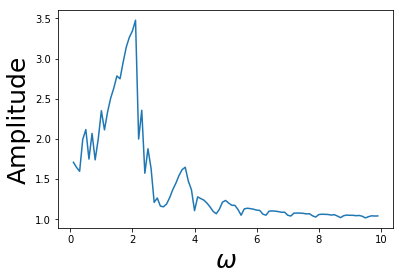

In [295]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

Amplitude = []
Omega = []

for omega in np.arange(0.1, 10, 0.1):
    
    Omega.append(omega)

    #   Initialization
    F_0 = 2
    a = 0.
    b = 20
    n = int(b*100.)
    ydumb = np.zeros(2)
    y = np.zeros(2)
    tt=np.zeros(n+2)
    yy1=np.zeros(n+2)
    yy2=np.zeros(n+2)
    fReturn = np.zeros(2)
    k1 = np.zeros(2)
    k2 = np.zeros(2)
    k3 = np.zeros(2)
    k4 = np.zeros(2)
    y[0] = 1. 
    y[1] = 0.
    t = a
    tt[0]=t
    yy1[0]=y[0]
    yy2[0]=y[1]
    h = (b-a)/n
    j = 0

    def f( t, y, fReturn ):
        fReturn[0] = y[1]
        fReturn[1] = F_0*np.sin(omega*t)-y[0]**3

    while (t < b):
        if ( (t + h) > b ):
            h = b - t
        f(t, y, fReturn)                              # Evaluate RHS's, return in fReturn
        k1[0] = h*fReturn[0];  k1[1] = h*fReturn[1]   # Compute function values
        for i in range(0, 2): ydumb[i] = y[i] + k1[i]/2. 
        f(t + h/2., ydumb, fReturn) 
        k2[0] = h*fReturn[0];  k2[1] = h*fReturn[1] 
        for i in range(0, 2):  ydumb[i] = y[i] + k2[i]/2. 
        f(t + h/2., ydumb, fReturn)
        k3[0] = h*fReturn[0];  k3[1] = h*fReturn[1] 
        for i in range(0, 2): ydumb[i] = y[i] + k3[i] 
        f(t + h, ydumb, fReturn) 
        k4[0] = h*fReturn[0];   k4[1] = h*fReturn[1]  
        for i in range(0, 2): 
            y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  
        yy2[j]=y[1]

    
    index = np.argmax(yy1)
    Amplitude.append(yy1[index])

plt.plot(Omega, Amplitude)
plt.xlabel('$\omega$', fontsize = 25)
plt.ylabel('Amplitude', fontsize = 25)
plt.show

Now the amplitude peak is centered around $\omega = 2\omega_0$. That is to say, resonance accurs when the natural frequency is roughly twice as large as the driving frequency!